# **SVHN classification using CNN ~ 94% (Format 1)**


## **Imports**

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


**Importing libraries**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import h5py
import glob
import cv2
import PIL
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import keras
import keras.utils
from keras import utils as np_utils
from keras.preprocessing.image import ImageDataGenerator

## **Reading Image**

**Reading image function**

In [ ]:
def read_image(path):
    import cv2
    import os
    import glob
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    file_names = ["{}{}.png".format(path,i+1) for i in range(len(files))]
    for f1 in file_names:
        image = cv2.imread(f1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        data.append(image)
        if (len(data)==33401):
            break
        print(len(data),".png",sep="")
    return data

**Reading train images**

In [ ]:
training_dataset = read_image("/content/drive/My Drive/Colab Notebooks/train/")

Streaming output truncated to the last 5000 lines.
28402.png
28403.png
28404.png
28405.png
28406.png
28407.png
28408.png
28409.png
28410.png
28411.png
28412.png
28413.png
28414.png
28415.png
28416.png
28417.png
28418.png
28419.png
28420.png
28421.png
28422.png
28423.png
28424.png
28425.png
28426.png
28427.png
28428.png
28429.png
28430.png
28431.png
28432.png
28433.png
28434.png
28435.png
28436.png
28437.png
28438.png
28439.png
28440.png
28441.png
28442.png
28443.png
28444.png
28445.png
28446.png
28447.png
28448.png
28449.png
28450.png
28451.png
28452.png
28453.png
28454.png
28455.png
28456.png
28457.png
28458.png
28459.png
28460.png
28461.png
28462.png
28463.png
28464.png
28465.png
28466.png
28467.png
28468.png
28469.png
28470.png
28471.png
28472.png
28473.png
28474.png
28475.png
28476.png
28477.png
28478.png
28479.png
28480.png
28481.png
28482.png
28483.png
28484.png
28485.png
28486.png
28487.png
28488.png
28489.png
28490.png
28491.png
28492.png
28493.png
28494.png
28495.png
28496.png

**Reading test images**

In [ ]:
test_dataset = read_image("/content/drive/My Drive/Colab Notebooks/test/")

Streaming output truncated to the last 5000 lines.
8070.png
8071.png
8072.png
8073.png
8074.png
8075.png
8076.png
8077.png
8078.png
8079.png
8080.png
8081.png
8082.png
8083.png
8084.png
8085.png
8086.png
8087.png
8088.png
8089.png
8090.png
8091.png
8092.png
8093.png
8094.png
8095.png
8096.png
8097.png
8098.png
8099.png
8100.png
8101.png
8102.png
8103.png
8104.png
8105.png
8106.png
8107.png
8108.png
8109.png
8110.png
8111.png
8112.png
8113.png
8114.png
8115.png
8116.png
8117.png
8118.png
8119.png
8120.png
8121.png
8122.png
8123.png
8124.png
8125.png
8126.png
8127.png
8128.png
8129.png
8130.png
8131.png
8132.png
8133.png
8134.png
8135.png
8136.png
8137.png
8138.png
8139.png
8140.png
8141.png
8142.png
8143.png
8144.png
8145.png
8146.png
8147.png
8148.png
8149.png
8150.png
8151.png
8152.png
8153.png
8154.png
8155.png
8156.png
8157.png
8158.png
8159.png
8160.png
8161.png
8162.png
8163.png
8164.png
8165.png
8166.png
8167.png
8168.png
8169.png
8170.png
8171.png
8172.png
8173.png
8174.png
8175

**Data shaped**

In [ ]:
print("Length of training dataset: ", len(training_dataset))
print("Length of test datset: ", len(test_dataset))

Length of training dataset:  33401
Length of test datset:  13068


## **Data Visualization**

**Image Visualization**

In [ ]:
def plot_image(Image):
    #%pylab inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    imgplot = plt.imshow(Image, cmap = "gray")
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


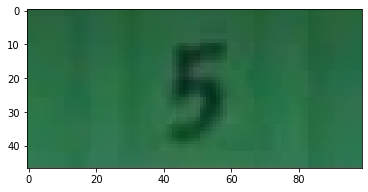

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img= cv2.imread("/content/drive/My Drive/Colab Notebooks/test/1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

data = []
data.append(img)
imgplot = plt.imshow(img)
plt.show()

**Visualize the first ten photos in the training set**

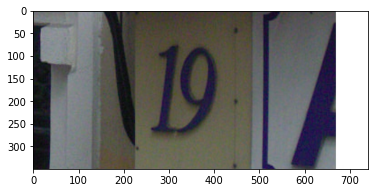

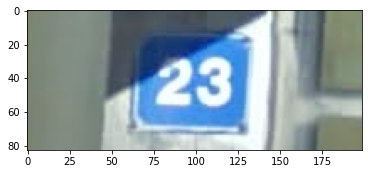

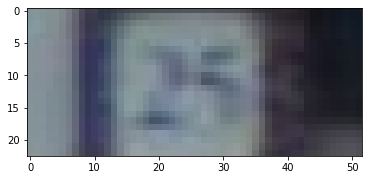

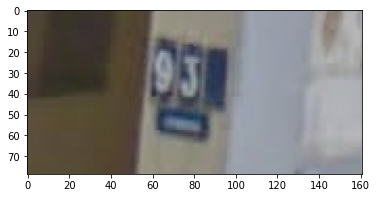

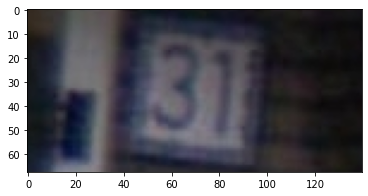

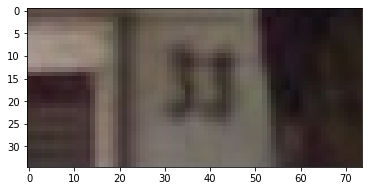

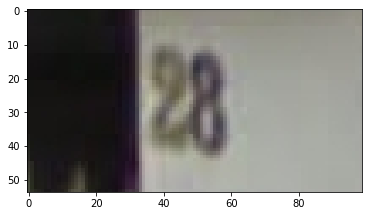

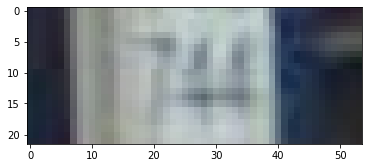

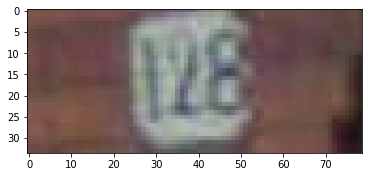

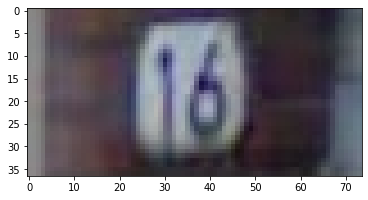

In [ ]:
for i in range(10):
    plot_image(training_dataset[i])

**Visualize the first ten photos in the test set**

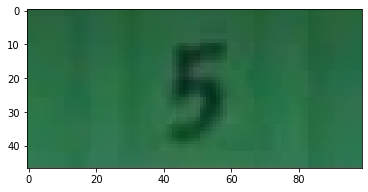

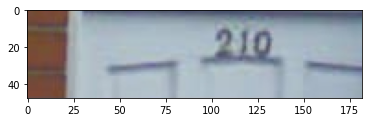

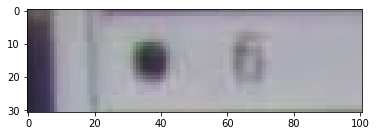

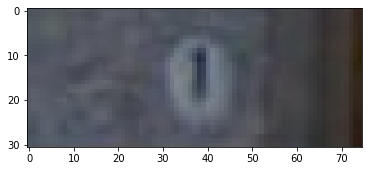

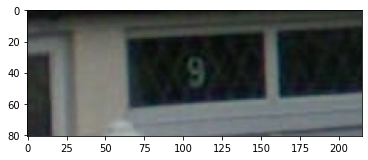

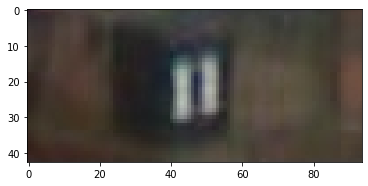

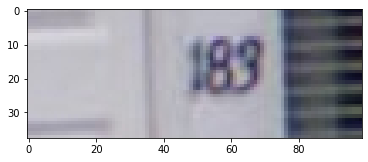

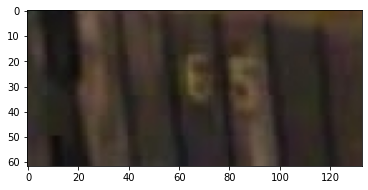

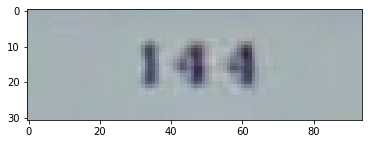

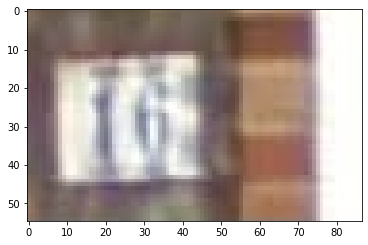

In [ ]:
for i in range(10):
    plot_image(test_dataset[i])

## **Data Preprocessing**

**Defining functions to get pic names and bounding boxes info from .mat file**

In [ ]:
def get_name(f, index=0):
    name = f['/digitStruct/name']
    return ''.join([chr(v[0]) for v in f[(name[index][0])]])


def get_bbox(f, index=0):
     meta = { key : [] for key in ['height', 'left', 'top', 'width', 'label']}
     def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(int(obj[0][0]))
        else:
            for k in range(obj.shape[0]):
                vals.append(int(f[obj[k][0]][0][0]))
        meta[name] = vals
     box = f['/digitStruct/bbox'][index]
     f[box[0]].visititems(print_attrs)
     return meta

**Getting train set's name and bbox data + cropping images**

In [ ]:
def crop_image(path, dataset, label_dataset, X, Y):
    data_name = []
    data_bbox = []
    size = len(dataset)
    with h5py.File(path, 'r') as folder_data:
        # Getting data
        for i in range(size):
            data_name.append(get_name(folder_data, i))
            data_bbox.append(get_bbox(folder_data, i))
            print(data_name[i])
            # Cropping current image
            cropped = []
            label = []
            for k in range(len(data_bbox[i]['top'])):
                top = data_bbox[i]['top'][k]
                left = data_bbox[i]['left'][k]
                height = data_bbox[i]['height'][k]
                width = data_bbox[i]['width'][k]
                image = dataset[i][top:top+height,left:left+width]
                if (image.shape[0]==0 or image.shape[1]==0):
                    continue;
                label.append(data_bbox[i]['label'][k])
                cropped.append(dataset[i][top:top+height,left:left+width])
                X.append(dataset[i][top:top+height,left:left+width])
                Y.append(data_bbox[i]['label'][k])
            dataset[i] = cropped
            label_dataset.append(label)

**Crop image in training dataset**

In [ ]:
label_training_dataset = []
X_train = []
Y_train = []
crop_image('/content/drive/My Drive/Colab Notebooks/train_digitStruct.mat', training_dataset, label_training_dataset, X_train, Y_train)

Streaming output truncated to the last 5000 lines.
28403.png
28404.png
28405.png
28406.png
28407.png
28408.png
28409.png
28410.png
28411.png
28412.png
28413.png
28414.png
28415.png
28416.png
28417.png
28418.png
28419.png
28420.png
28421.png
28422.png
28423.png
28424.png
28425.png
28426.png
28427.png
28428.png
28429.png
28430.png
28431.png
28432.png
28433.png
28434.png
28435.png
28436.png
28437.png
28438.png
28439.png
28440.png
28441.png
28442.png
28443.png
28444.png
28445.png
28446.png
28447.png
28448.png
28449.png
28450.png
28451.png
28452.png
28453.png
28454.png
28455.png
28456.png
28457.png
28458.png
28459.png
28460.png
28461.png
28462.png
28463.png
28464.png
28465.png
28466.png
28467.png
28468.png
28469.png
28470.png
28471.png
28472.png
28473.png
28474.png
28475.png
28476.png
28477.png
28478.png
28479.png
28480.png
28481.png
28482.png
28483.png
28484.png
28485.png
28486.png
28487.png
28488.png
28489.png
28490.png
28491.png
28492.png
28493.png
28494.png
28495.png
28496.png
28497.png

**Crop image in test dataset**

In [ ]:
label_test_dataset = []
X_test = []
Y_test = []
crop_image('/content/drive/My Drive/Colab Notebooks/test_digitStruct.mat', test_dataset, label_test_dataset, X_test, Y_test)

Streaming output truncated to the last 5000 lines.
8070.png
8071.png
8072.png
8073.png
8074.png
8075.png
8076.png
8077.png
8078.png
8079.png
8080.png
8081.png
8082.png
8083.png
8084.png
8085.png
8086.png
8087.png
8088.png
8089.png
8090.png
8091.png
8092.png
8093.png
8094.png
8095.png
8096.png
8097.png
8098.png
8099.png
8100.png
8101.png
8102.png
8103.png
8104.png
8105.png
8106.png
8107.png
8108.png
8109.png
8110.png
8111.png
8112.png
8113.png
8114.png
8115.png
8116.png
8117.png
8118.png
8119.png
8120.png
8121.png
8122.png
8123.png
8124.png
8125.png
8126.png
8127.png
8128.png
8129.png
8130.png
8131.png
8132.png
8133.png
8134.png
8135.png
8136.png
8137.png
8138.png
8139.png
8140.png
8141.png
8142.png
8143.png
8144.png
8145.png
8146.png
8147.png
8148.png
8149.png
8150.png
8151.png
8152.png
8153.png
8154.png
8155.png
8156.png
8157.png
8158.png
8159.png
8160.png
8161.png
8162.png
8163.png
8164.png
8165.png
8166.png
8167.png
8168.png
8169.png
8170.png
8171.png
8172.png
8173.png
8174.png
8175

**Visualize images on cropping**

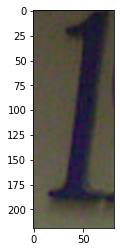

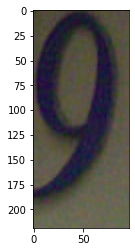

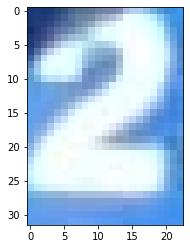

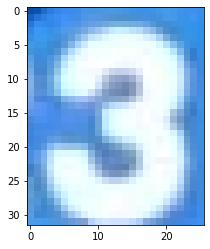

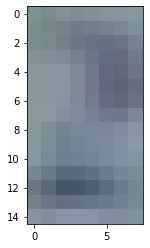

In [ ]:
for i in range(5):
    plot_image(X_train[i])

**Find minimum and maximum of height and width all images**

In [ ]:
min_image_size = 999999999
max_image_size = 0
for i in range(0,len(X_train)):
    height = X_train[i].shape[0]
    width = X_train[i].shape[1]
    min_image_size = min(min(min_image_size, height), width)
    max_image_size = max(max(max_image_size, height), width)
print("Min image size: ",min_image_size)
print("Max image size: ",max_image_size)

Min image size:  1
Max image size:  403


**Convert RGB color to Gray Scale**

In [ ]:
for i in range(0, len(X_train)):
    X_train[i] = rgb2gray(X_train[i])

In [ ]:
for i in range(0,len(X_test)):
    X_test[i] = rgb2gray(X_test[i])

**Visualize image after converting to GRAY SCALE**

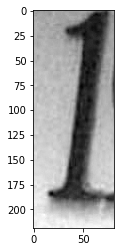

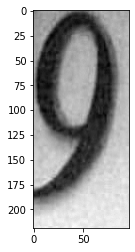

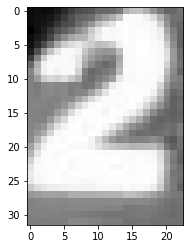

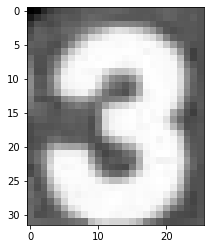

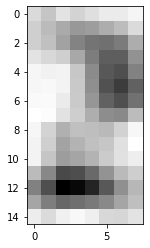

In [ ]:
for i in range(5):
    plot_image(X_train[i])

**Check faulty image and resize images to the same size**

In [ ]:
image_size = (32,32)
invalid_frame = []
for i in range(0, len(X_train)):
    try:
        X_train[i] = cv2.resize(X_train[i], image_size)
    except cv2.error as e:
        print('Invalid frame!',i)
        invalid_frame.append(i)
        print(X_train[i].shape)
    cv2.waitKey()
for i in range(0,len(invalid_frame)):
    X_train.pop(invalid_frame[i]-i)
    Y_train.pop(invalid_frame[i]-i)

In [ ]:
invalid_frame = []
for i in range(0, len(X_test)):
    try:
        X_test[i] = cv2.resize(X_test[i], image_size)
    except cv2.error as e:
        print('Invalid frame!',i)
        invalid_frame.append(i)
        print(X_test[i].shape)
    cv2.waitKey()
for i in range(0,len(invalid_frame)):
    X_test.pop(invalid_frame[i]-i)
    Y_test.pop(invalid_frame[i]-i)

**Convert training image list to numpy array**

In [ ]:
X_train = numpy.array(X_train)
Y_train = numpy.array(Y_train)

In [ ]:
X_test = numpy.array(X_test)
Y_test = numpy.array(Y_test)

**Fit and transform the label values to a one-hot-encoding scheme (ready for CNN)**

In [ ]:
enc = OneHotEncoder(sparse=False)
Y_train = enc.fit_transform(Y_train.reshape(-1,1))

In [ ]:
Y_test = enc.transform(Y_test.reshape(-1,1))

**X and Y shapes after preprocessing**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

In [ ]:
print("Training set: ", X_train.shape, Y_train.shape)
print("Validation set: ", X_val.shape, Y_val.shape)
print("Test set: ", X_test.shape, Y_test.shape)

Training set:  (62241, 32, 32) (62241, 10)
Validation set:  (10984, 32, 32) (10984, 10)
Test set:  (26024, 32, 32) (26024, 10)


**Reshape X from 3 dimensions to 4 dimensions (ready for CNN)**



In [ ]:
X_train = X_train.reshape(-1,image_size[0],image_size[1],1)
X_test = X_test.reshape(-1,image_size[0],image_size[1],1)
X_val = X_val.reshape(-1,image_size[0],image_size[1],1)

## **Setting and Training Model**

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(image_size[0], image_size[1], 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    

    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    

    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_cnn.h5', 
                   save_best_only=True)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)       

In [ ]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                              epochs=50, validation_data=(X_val, Y_val),
                              callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
487/487 [==============================] - 38s 77ms/step - loss: 1.8355 - accuracy: 0.3366 - val_loss: 1.2035 - val_accuracy: 0.6539
Epoch 2/50
487/487 [==============================] - 36s 75ms/step - loss: 1.1799 - accuracy: 0.5695 - val_loss: 0.6631 - val_accuracy: 0.8020
Epoch 3/50
487/487 [==============================] - 35s 73ms/step - loss: 0.7094 - accuracy: 0.7729 - val_loss: 0.5147 - val_accuracy: 0.8494
Epoch 4/50
487/487 [==============================] - 36s 74ms/step - loss: 0.4840 - accuracy: 0.8590 - val_loss: 0.3381 - val_accuracy: 0.9046
Epoch 5/50
487/487 [==============================] - 36s 75ms/step - loss: 0.4002 - accuracy: 0.8858 - val_loss: 0.2939 - val_accuracy: 0.9211
Epoch 6/50
487/487 [==============================] - 37s 75ms/step - loss: 0.3611 - accuracy: 0.8980 - val_loss: 0.2982 - val_accuracy: 0.9206
Epoch 7/50
487/487 [==============================] - 37s 75ms/step - loss: 0.3276 - accuracy: 0.9082 - val_loss: 0.2860 - val_accuracy:

## **Visualizations and insights**

**Evaluate train and validation accuracies and losses**

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

**Visualize epochs vs. train and validation accuracies and losses**

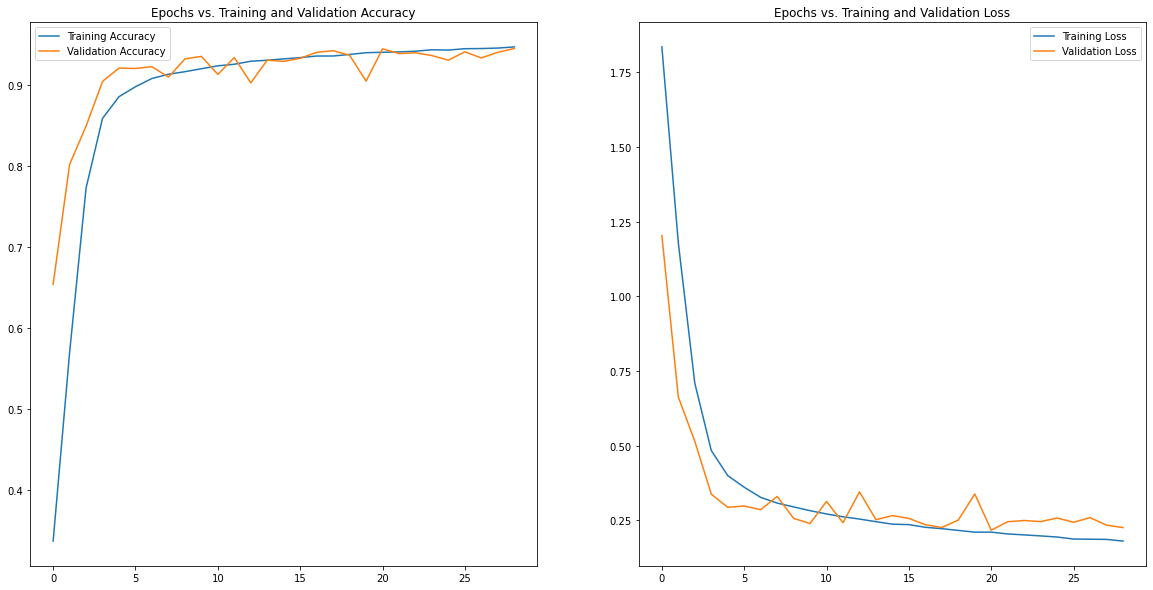

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

**Get predictions and apply inverse transformation to the labels**

In [ ]:
Y_pred = model.predict(X_train)
Y_pred = enc.inverse_transform(Y_pred)
Y_train = enc.inverse_transform(Y_train)

**Plot the confusion matrix for training set**

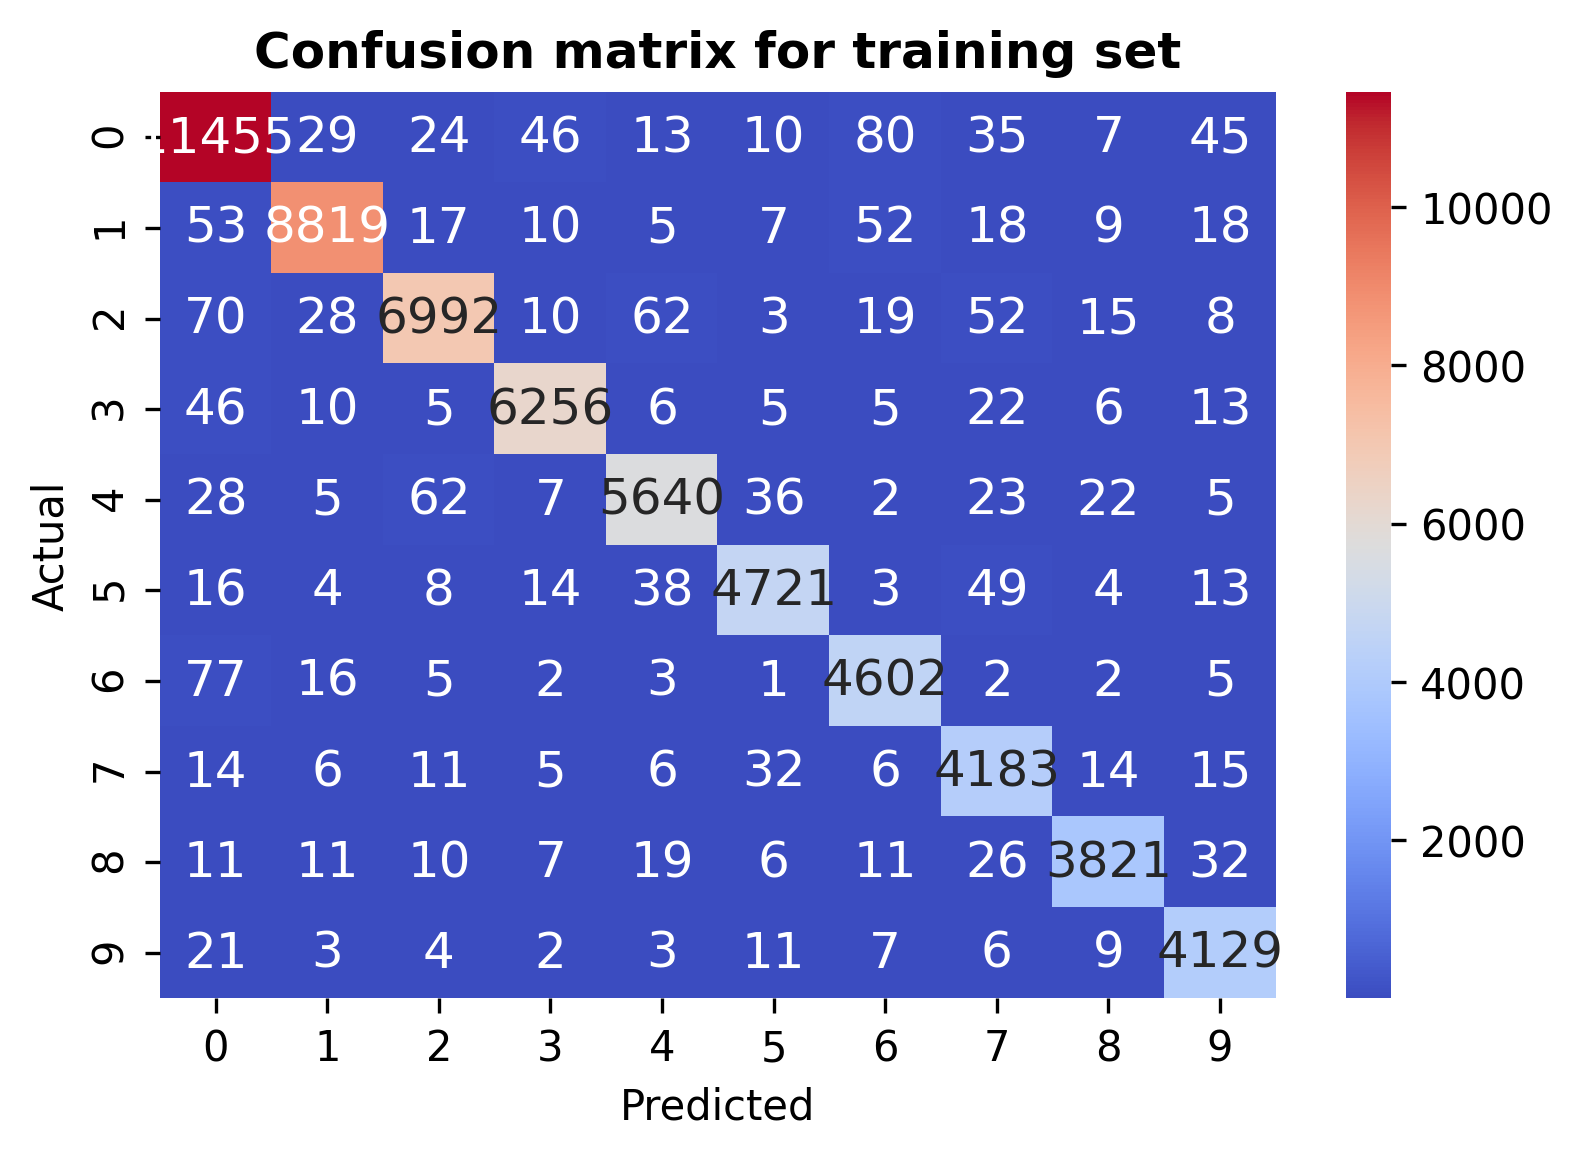

In [ ]:
plt.figure(dpi=300)
cm = confusion_matrix(Y_train, Y_pred)
plt.title('Confusion matrix for training set', weight='bold')
sns.heatmap(cm,annot=True,fmt='g',cmap='coolwarm',annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Model Evaluation**

**Evaluate model on test set**

In [ ]:
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test, verbose=0)

In [ ]:
print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))


Test accuracy is: 0.9483 
Test loss is: 0.2036


**Evaluate character accuracy on test set** 

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = enc.inverse_transform(Y_pred)
Y_test = enc.inverse_transform(Y_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.94      0.95      0.95      5098
           2       0.98      0.96      0.97      4147
           3       0.96      0.91      0.94      2882
           4       0.97      0.96      0.96      2522
           5       0.97      0.94      0.96      2383
           6       0.94      0.95      0.95      1976
           7       0.93      0.94      0.94      2019
           8       0.92      0.95      0.93      1658
           9       0.93      0.93      0.93      1595
          10       0.91      0.98      0.94      1744

    accuracy                           0.95     26024
   macro avg       0.94      0.95      0.95     26024
weighted avg       0.95      0.95      0.95     26024



In [ ]:
def accuracy_multi(dataset,label_dataset, Y_true, Y_pred):
    count_image_recognized_correctly = 0
    F = []
    F.append(len(label_dataset[0]))
    for i in range(len(label_dataset)):
        if (i>0):   
            F.append(F[i-1]+len(label_dataset[i]))
        Check = True;
        for k in range(len(label_dataset[i])):
            if (i>0):
                p = F[i-1]+k
            else:
                p = 0
            if (Y_pred[p][0]!=Y_true[p][0]):
                Check = False
                break
                #print(i,Y_pred[p][0],Y_true[p][0])
        if (Check==True):
            count_image_recognized_correctly += 1
    return count_image_recognized_correctly/len(test_dataset)

**Evaluate sequence accuracy all images on test set**

In [ ]:
print("Test image accuracy: ",accuracy_multi(test_dataset, label_test_dataset, Y_test, Y_pred))

Test image accuracy:  0.9091674318947046
